ASSIGNMENT 7

Every year many students give the GRE exam to get admission in foreign Universities. The data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable.
The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. So to help the counselor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not.

1. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.
2. Perform data-preparation (Train-Test Split)
3. Apply Machine Learning Algorithm.
4. Eva/luate Model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("/content/admission.xlsx")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:

df.isnull().values.any()

np.False_

In [4]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         500 non-null    int64  
 1   GREScore          500 non-null    int64  
 2   TOEFLScore        500 non-null    int64  
 3   UniversityRating  500 non-null    int64  
 4   SOP               500 non-null    float64
 5   LOR               500 non-null    float64
 6   CGPA              500 non-null    float64
 7   Research          500 non-null    int64  
 8   ChanceofAdmit     500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.sum()

,0
SerialNo.,125250.00
GREScore,158236.00
TOEFLScore,53596.00
UniversityRating,1557.00
SOP,1687.00
LOR,1742.00
CGPA,4288.22
Research,280.00
ChanceofAdmit,360.87


In [7]:
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1


In [8]:
from sklearn.model_selection import train_test_split

In [9]:

X = df.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = df['ChanceofAdmit']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [12]:
#Using the decision tree classifier model.

model_clf = DecisionTreeClassifier()
model_clf = model_clf.fit(X_train, y_train)
y_pred = model_clf.predict(X_test)


In [13]:
#Evaluate the model.
print("Confusion Matrix:\n")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix:

[[85  5]
 [12 23]]


In [14]:
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("Recall Score:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy Score: 0.864
Precision Score: 0.8214285714285714
Recall Score: 0.6571428571428571
F1 Score: 0.7301587301587301


In [15]:

print(y_test)

432    1.0
79     0.0
361    1.0
131    0.0
325    1.0
      ... 
83     1.0
444    1.0
348    0.0
394    1.0
108    1.0
Name: ChanceofAdmit, Length: 125, dtype: float64


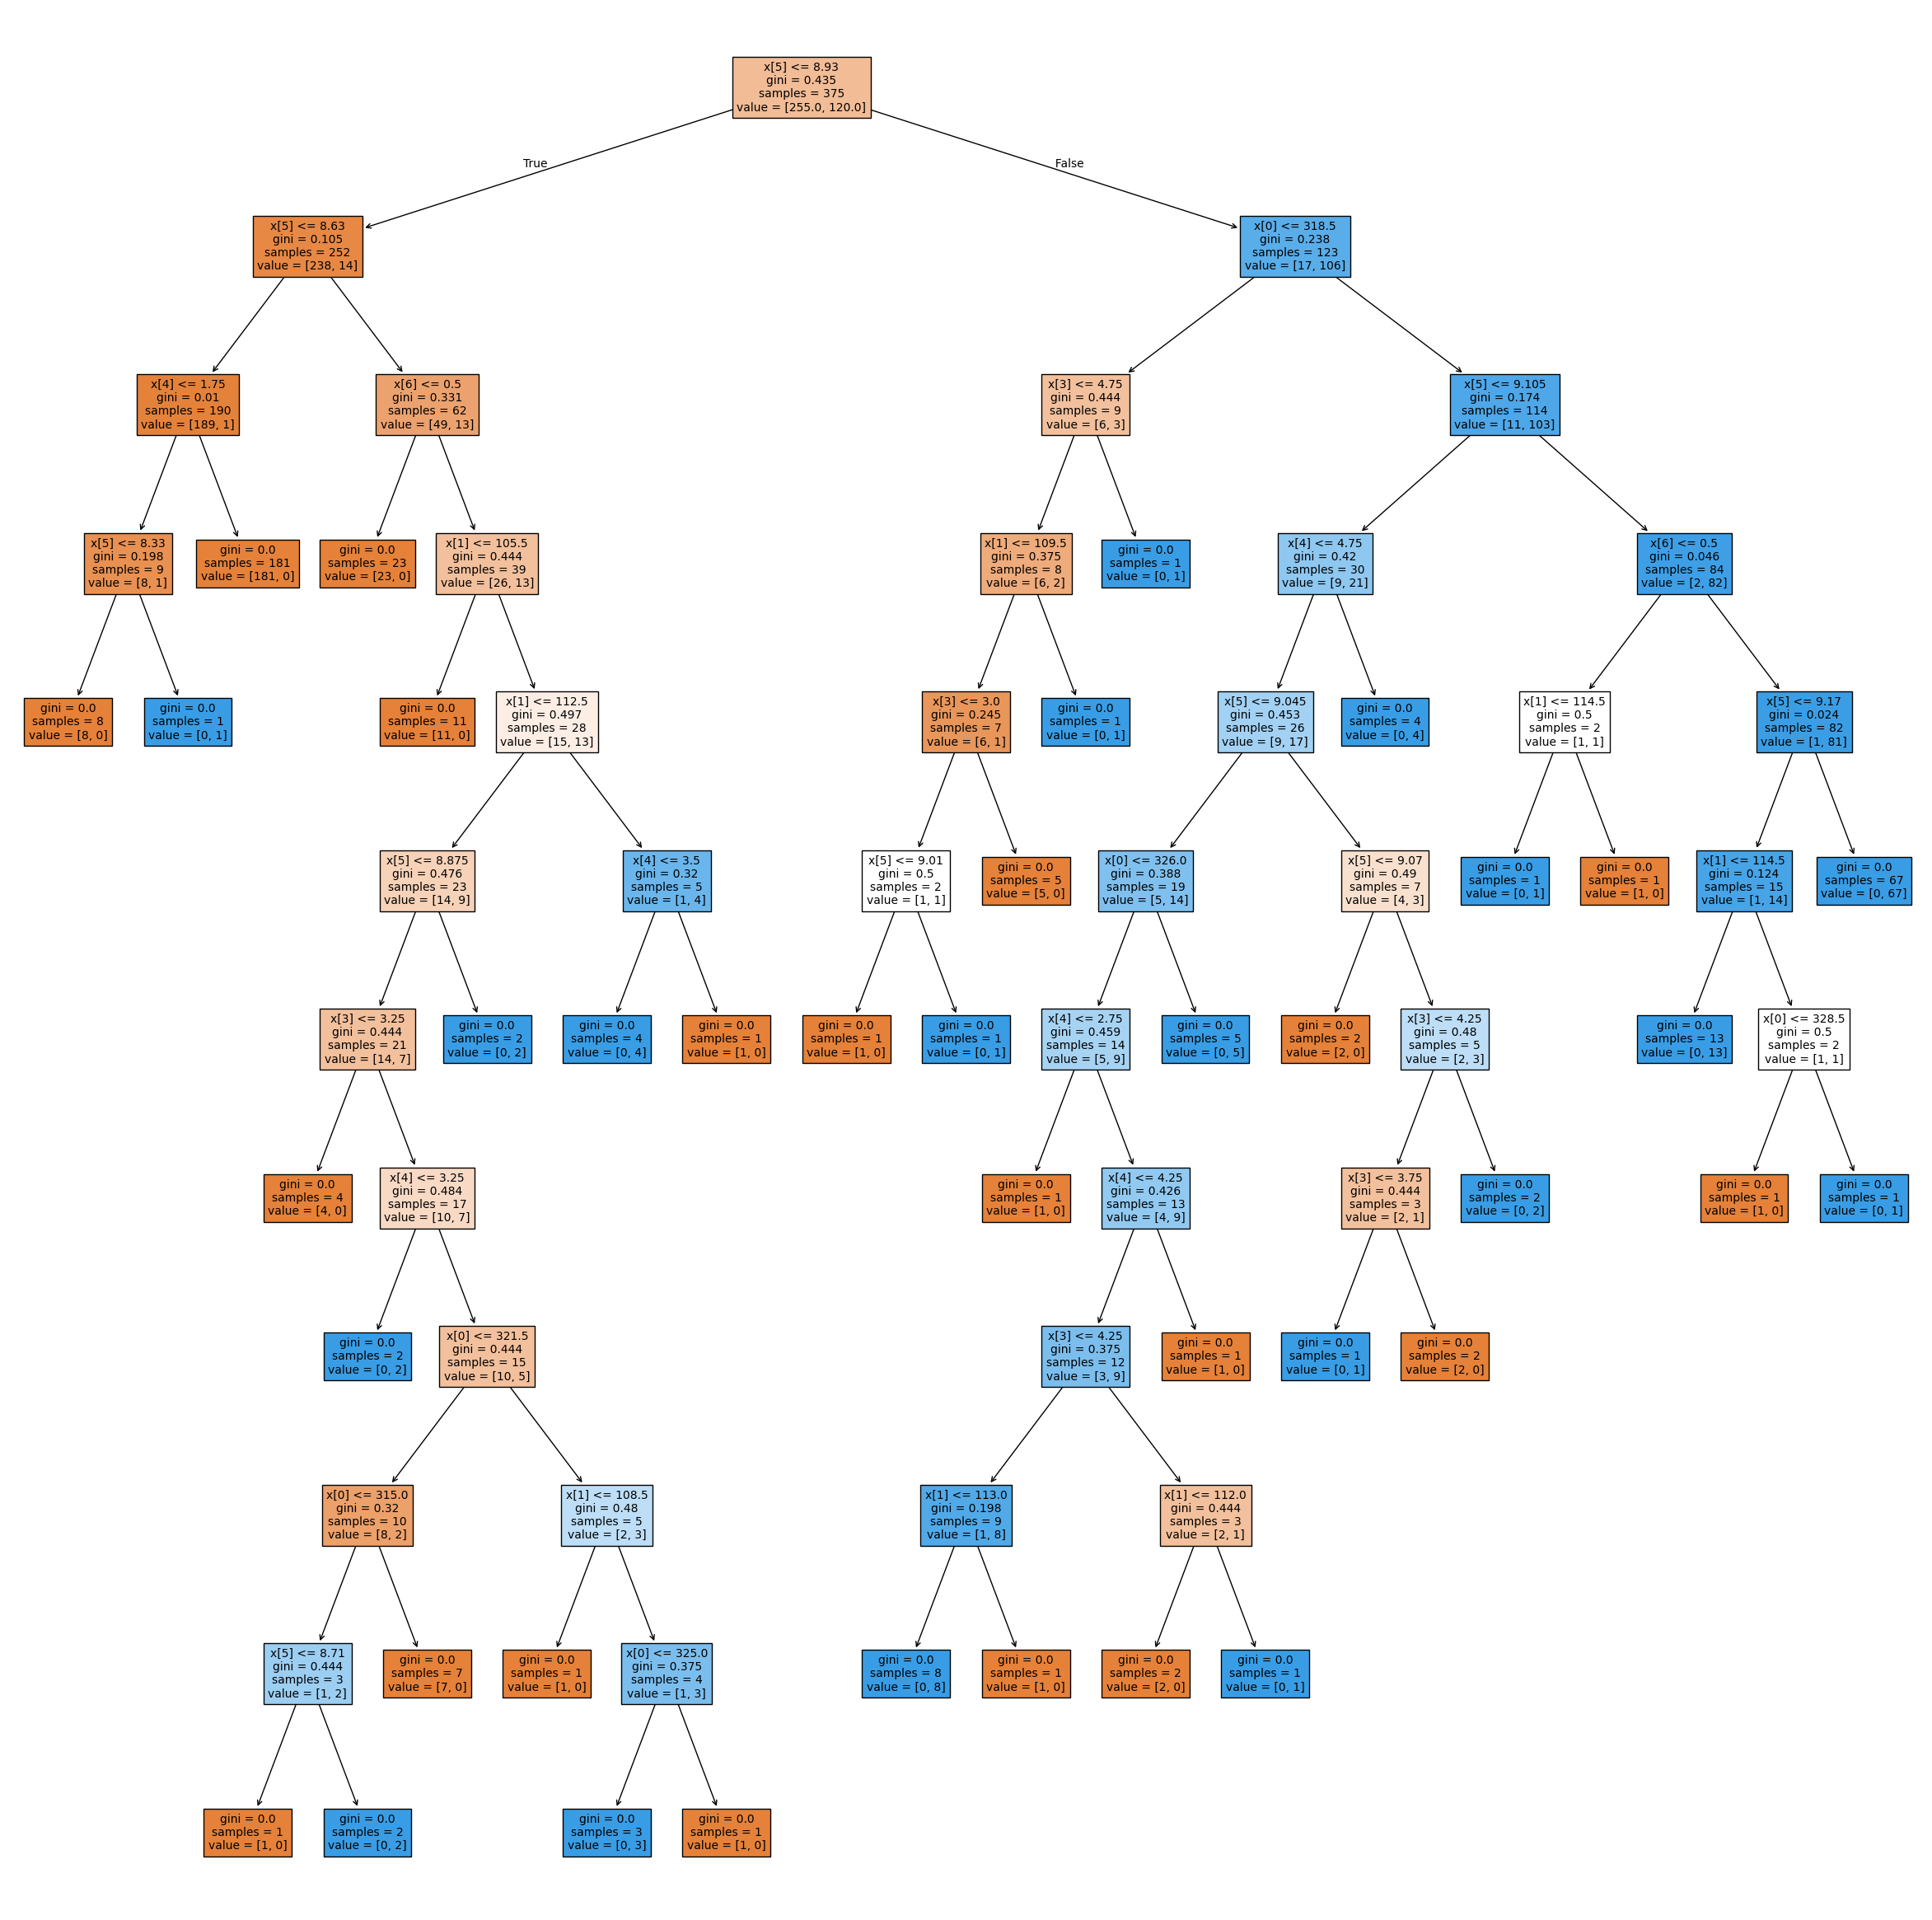

In [16]:

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(model_clf,filled=True,fontsize=10)
plt.show()